In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries :

In [ ]:
# Installing libraries - langdetect, pycountry
!pip install langdetect pycountry emoji pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 126.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 82.2 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=6504748b19b64e3c0eebab1ac82d3185be88764a2430f86cd0e572c7a0ae5f21
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=d58be513e776fdf26748635ecda281477c2dc6f615e0d1b987176c994aeef159
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d7

In [ ]:
# Importing libraries to handel data sets
import csv                                              # For csv files
import json                                             # For json files
import gzip                                             # For compressed files

# Libraries to handle datetime data
import datetime as dt                                   # To manipulate dates

# Libraries for data manipulation and visualization
import ast                                              # Abstract Syntax Trees (ast) package
import numpy as np                                      # To manipulate arrays
import pandas as pd                                     # To manipulate dataframes
from scipy import sparse                                # To manipulate spare matrices

import matplotlib.pyplot as plt                         # To create charts and graphs
from matplotlib.patches import ConnectionPatch          # For graphs
import seaborn as sns                                   # To visualize
from wordcloud import WordCloud,STOPWORDS               # To create world cloud graphs
import emoji                                            # For emojis

# Libraries to process text data
import re                                               # To apply regular expressions over string data
import string
import pycountry                                        # To convert ISO codes of languages into subjective strings

from langdetect import detect, DetectorFactory          # To detect language of the text
DetectorFactory.seed = 0                                # Setting seed value to enforce consistent results (Language detection is non-deterministic)

import spacy                                            # To create NLP objects
spacy.cli.download('en_core_web_lg')                    # Loading 'english' model trained on large datasets
nlp=spacy.load('en_core_web_lg')                        # Creating a spacy instance

# Libraries for transforming data
from sklearn.preprocessing import StandardScaler,MinMaxScaler                             # To scale the numeric data
from sklearn.model_selection import train_test_split                                      # To split data into train and test sets

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer               # To vectorize text data
from sklearn.preprocessing import MultiLabelBinarizer,LabelBinarizer                      # To encode and/or binarize data

# Libraries for statistical testing
import scipy.stats as sts

# Libraries for building models
from sklearn.multiclass import OneVsRestClassifier                    # To handle multilabeled target variables

from sklearn.linear_model import LogisticRegression                   # For classification of binary classes
from sklearn.naive_bayes import MultinomialNB                         # For classification
from sklearn.linear_model import SGDClassifier                        # For classification

from sklearn.cluster import KMeans                                    # For clustering

import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Libraries for evaluating models
from sklearn.metrics import silhouette_score                          # To calculate similarity of datapoints within a cluster
from sklearn.metrics import confusion_matrix,classification_report    # To get classification model reports
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Libraries to handel warnings
import warnings
warnings.filterwarnings('ignore')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Spacy pipeline
print('Original pipeline : ',nlp.pipe_names)

#nlp.disable_pipes()                                 # type in function to disable in the pipeline

print('Amended pipeline :',nlp.pipe_names)

Original pipeline :  ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Amended pipeline : ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


# Reading reviews data :

In [ ]:
# Function to read a string as a literal
def read_string_literal(strg) :
  try :
    return ast.literal_eval(strg)
  except :
    return pd.NaT

# Function to convert column to datetime object
def date_time_column(col,format_date='%Y-%m-%d') :
  return pd.to_datetime(col,format=format_date)

In [ ]:
# Reading reviews in chunks : CSV
dict1={}
convert_cols={'reviewTime':date_time_column,'pos_words':read_string_literal,'neg_words':read_string_literal,'categories':read_string_literal}
i=0
with pd.read_csv('/content/drive/MyDrive/Project/capstone_project_data (2).csv',chunksize=50000,converters=convert_cols) as reader :
  reader
  for chunk in reader :
    dict1[i]=chunk
    i+=1

data=pd.concat(dict1,axis=0)
data=data.droplevel(level=0)

display(pd.concat([data.head(3),data.tail(3)],axis=0))

,reviewerID,asin,reviewerName,reviewText,overall,reviewTime,Positive_feedback,Total_feedback,helpfulness_ratio,price,...,neg_words,no_pos,no_neg,total_words,polarity,sentiment,weekday,brand,categories,set
0,APYOBQE6M18AA,0615391206,Martin Schwartz,My daughter wanted this book and the price on ...,5.0,2013-10-19,0,0,0.000000,17.29,...,[],3.0,0.0,14.0,0.21,Positive,Saturday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,I bought this zoku quick pop for my daughterr ...,5.0,2014-06-18,0,0,0.000000,17.29,...,[],2.0,0.0,9.0,0.22,Positive,Wednesday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,There is no shortage of pop recipes available ...,4.0,2013-05-05,26,27,0.962963,17.29,...,"[shortage, scream, freeze, limited, gimmicky, ...",21.0,8.0,200.0,0.07,Neutral,Sunday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
702932,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","While I usually review CDs and DVDs, as well a...",5.0,2014-07-01,1,1,1.000000,13.00,...,"[allergic, intolerance, concerned]",12.0,3.0,158.0,0.06,Neutral,Tuesday,Enjoy,[Grocery & Gourmet Food],ggf
702933,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,My son and I enjoyed these oatmeal packets. H...,4.0,2014-07-04,0,1,0.000000,13.00,...,[junk],10.0,1.0,48.0,0.19,Positive,Friday,Enjoy,[Grocery & Gourmet Food],ggf
702934,A2CF66KIQ3RKX3,B00KCJRVO2,Vivian Deliz,I like to eat oatmeal i the mornings. I usuall...,4.0,2014-07-11,0,0,0.000000,13.00,...,"[suspect, cheap]",5.0,2.0,42.0,0.07,Neutral,Friday,Enjoy,[Grocery & Gourmet Food],ggf


In [ ]:
data['set']=data['categories'].apply(lambda x : 'hk' if 'Home & Kitchen' in x else 'ggf')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702935 entries, 0 to 702934
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   reviewerID         702935 non-null  object        
 1   asin               702935 non-null  object        
 2   reviewerName       696448 non-null  object        
 3   reviewText         702935 non-null  object        
 4   overall            702935 non-null  float64       
 5   reviewTime         702935 non-null  datetime64[ns]
 6   Positive_feedback  702935 non-null  int64         
 7   Total_feedback     702935 non-null  int64         
 8   helpfulness_ratio  702935 non-null  float64       
 9   price              632353 non-null  float64       
 10  language           702935 non-null  object        
 11  cleanText          702840 non-null  object        
 12  pos_words          702840 non-null  object        
 13  neg_words          702840 non-null  object  

In [ ]:
data.isnull().sum()

reviewerID               0
asin                     0
reviewerName          6487
reviewText               0
overall                  0
reviewTime               0
Positive_feedback        0
Total_feedback           0
helpfulness_ratio        0
price                70582
language                 0
cleanText               95
pos_words               95
neg_words               95
no_pos                  95
no_neg                  95
total_words             95
polarity                95
sentiment                0
weekday                  0
brand                    0
categories               0
set                      0
dtype: int64

# Classification :

## Functions :

In [ ]:
# String of punctuations
puncts=re.sub("'|`",'',string.punctuation)                 # Removing ' and ` from a string of punctuations

# Function to split data in train and test sets
def split_train_test(features,target,random_value,test_ratio=0.2) :
  train_x, test_x, train_y, test_y = train_test_split(features,target, random_state=random_value, test_size=test_ratio)

  print('Shape of train set :',train_x.shape,
       '\n\nShape of test set :',test_x.shape,
       '\n\nShape of target train set :',train_y.shape,
       '\n\nShape of target test set  :',test_y.shape,)

  return train_x, test_x, train_y, test_y

# Function for text pre processing
def txtpreprocess(old_txt,punctuation_string,nlp_obj=False) :
  try :
    new_txt=re.sub('http\S+','',old_txt)                                                                       # removing any web links
    new_txt=re.sub('`',"'",new_txt)                                                                            # replacing ` with ' so that stop words can be detected
    new_txt=''.join(x.lower() for x in new_txt if x not in punctuation_string and x not in string.digits)      # removing punctuations and digits
    new_txt=re.sub('[\n|\t|\r]*','',new_txt)                                                                   # removing escape characters
    new_txt=re.sub('x{2,}|X{2,}|ok{2,}','',new_txt)                                                            # removing repeat words

    txt_obj=nlp(new_txt)                                                                                       # NLP object based on cleaned text

    if nlp_obj==False :                                                                                # Block is executed if nlp_obj parameter is set to False
      token_list=[token.lemma_ for token in txt_obj if token.lemma_ not in stop_words_list and
                  token.lemma_ !='I' and token.is_space==False and len(token)>2 and
                  token.is_oov==False and token.ent_type_!='PERSON']                                           # list of lemmatized tokens satisfying given conditions
      return ' '.join(token for token in token_list)                                                           # returns this list as a string (cleaned text)

    else :
       return txt_obj                                                                                  # Block is executed if nlp_obj parameter is set to True

  except :
    return ''

# Function to predict new reviews
def new_review(feedback,vectorizer,model) :
  feedback=[txtpreprocess(old_txt=feedback,punctuation_string=puncts,nlp_obj=False)]
  v_txt=vectorizer.transform(feedback)

  return lb.inverse_transform(model.predict(v_txt))

## Data transformations :

In [ ]:
# Dataframe subset to be used for model building
df=data[data['language'].eq('English')][['cleanText','overall','sentiment']]              # Only english language reviews which are less than 50 words long
df['overall']=df['overall'].astype(int)

display(df.head(3))

print('\n\nDistribution of records along sentiments :\n')
display(df['sentiment'].value_counts())

#print('\nDistribution of records along ratings :\n')
#display(df['rating'].value_counts())

,cleanText,overall,sentiment
0,daughter want book price amazon good try recip...,5,Positive
1,buy quick pop quick maker love fun ice cream,5,Positive
2,shortage pop recipe available free web purchas...,4,Neutral




Distribution of records along sentiments :



Neutral     370469
Positive    247059
Negative     85317
Name: sentiment, dtype: int64

In [ ]:
# Checking the text dataframe
print('Null count before :')
display(df.isnull().sum())

# Droping null values
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

print('\nNull count after :')
display(df.isnull().sum())

Null count before :


cleanText    5
overall      0
sentiment    0
dtype: int64


Null count after :


cleanText    0
overall      0
sentiment    0
dtype: int64

In [ ]:
# Vectorizing text data
tfidf=TfidfVectorizer()               # creating an instance of the vectorizer : TFIDF
vec_text=tfidf.fit_transform(df['cleanText'])

count_vec=CountVectorizer()           # creating an instance of the vectorizer : Count vectorizer
cvec_text=count_vec.fit_transform(df['cleanText'])

In [ ]:
# Using label binariser to create binary data for each sentiment class
lb=LabelBinarizer()

target_binarized=lb.fit_transform(df['sentiment'])

print('The classes are :\n',lb.classes_)
display(target_binarized)

The classes are :
 ['Negative' 'Neutral' 'Positive']


array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [ ]:
# Splitting the sampled dataset into train and test sets : TFIDF vectorised
print('TFIDF vectorised :')
train_x, test_x, train_y, test_y = split_train_test(vec_text,target_binarized, random_value=42, test_ratio=0.2)

# Splitting the sampled dataset into train and test sets : Count vectorised
print('\n\nCount vectorised :')
train_x2, test_x2, train_y2, test_y2 = split_train_test(cvec_text,target_binarized, random_value=8, test_ratio=0.2)

TFIDF vectorised :
Shape of train set : (562272, 46148) 

Shape of test set : (140568, 46148) 

Shape of target train set : (562272, 3) 

Shape of target test set  : (140568, 3)


Count vectorised :
Shape of train set : (562272, 46148) 

Shape of test set : (140568, 46148) 

Shape of target train set : (562272, 3) 

Shape of target test set  : (140568, 3)


## Models :

One vs Rest Classifier ( Multilabelled target )

*   Logistic Regression
*   Multinomial Naive Bayes
*   Support Vector Classifier


In [ ]:
# Creating a dataframe to store and compare predictions of varios models with the test data
result=pd.DataFrame(lb.inverse_transform(test_y),columns=['actual'])            # using inverse_transform function of label binarizer to get class names : TFIDF vectorized

result_cv=pd.DataFrame(lb.inverse_transform(test_y2),columns=['actual'])            # using inverse_transform function of label binarizer to get class names : Count vectorized

print('TFIDF vectorised :')
display(result.head(10).T)
print('\n\nCount vectorised :\n')
display(result_cv.head(10).T)

TFIDF vectorised :


,0,1,2,3,4,5,6,7,8,9
actual,Positive,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,Negative,Positive,Positive




Count vectorised :



,0,1,2,3,4,5,6,7,8,9
actual,Neutral,Positive,Neutral,Negative,Neutral,Positive,Positive,Neutral,Positive,Positive


### Multinomial Naive Bayes Classifier :

In [ ]:
# TFIDF vecorized data
model_mnb=MultinomialNB()                       # Creating model instance

ovr = OneVsRestClassifier(model_mnb)

# Fitting the training sets
ovr.fit(train_x,train_y)

# Predicting
pred_mnb = ovr.predict(test_x)

result['Multi_NB']=lb.inverse_transform(pred_mnb)

# Model evaluation
report_mnb=classification_report(result['actual'],result['Multi_NB'],output_dict=True)

display(pd.crosstab(result['actual'],result['Multi_NB'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result['actual'],result['Multi_NB']))

Multi_NB,Negative,Neutral,Positive,support
actual,,,,
Negative,3471,13354,10,16835
Neutral,14797,56913,2681,74391
Positive,13327,15042,20973,49342





              precision    recall  f1-score   support

    Negative       0.11      0.21      0.14     16835
     Neutral       0.67      0.77      0.71     74391
    Positive       0.89      0.43      0.57     49342

    accuracy                           0.58    140568
   macro avg       0.55      0.47      0.48    140568
weighted avg       0.68      0.58      0.60    140568



In [ ]:
# Count Vectorized text data
model_mnb_cv=MultinomialNB()                  # Creating model instance

ovr_cv = OneVsRestClassifier(model_mnb_cv)

# Fitting the training sets
ovr_cv.fit(train_x2,train_y2)

# Predicting
result_cv['Multi_NB']=lb.inverse_transform(ovr_cv.predict(test_x2))

# Model evaluation
cv_report_mnb=classification_report(result_cv['actual'],result_cv['Multi_NB'],output_dict=True)

display(pd.crosstab(result_cv['actual'],result_cv['Multi_NB'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result_cv['actual'],result_cv['Multi_NB']))

Multi_NB,Negative,Neutral,Positive,support
actual,,,,
Negative,13408,3672,127,17207
Neutral,24638,35856,13279,73773
Positive,3620,8725,37243,49588





              precision    recall  f1-score   support

    Negative       0.32      0.78      0.46     17207
     Neutral       0.74      0.49      0.59     73773
    Positive       0.74      0.75      0.74     49588

    accuracy                           0.62    140568
   macro avg       0.60      0.67      0.60    140568
weighted avg       0.69      0.62      0.63    140568



**<h3> Model preformance : </h3>**


*   TFIDF model has good recall and precision for neutral class, but is not giving good metrics for positive and negative classes.

*   Count vectorizer model has good recall and precision for positive class, but is not giving good metrics for neutral and negative classes.




### Logistic Regression :

In [ ]:
# TFIDF vectorized data
lr = LogisticRegression(max_iter=200, verbose=1)           # Creating instance of Logistic Regression algorithm
ovr2 = OneVsRestClassifier(lr)                             # One vs Rest classifier using Log Reg for multiclass target variable

# Fitting the training data to the classifier
ovr2.fit(train_x, train_y)

# Predicting classes using test data
result['Log_Reg']=lb.inverse_transform(ovr2.predict(test_x))

# Model evaluation
report_lr=classification_report(result['actual'],result['Log_Reg'],output_dict=True)

display(pd.crosstab(result['actual'],result['Log_Reg'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result['actual'],result['Log_Reg']))

Log_Reg,Negative,Neutral,Positive,support
actual,,,,
Negative,14327,2508,0,16835
Neutral,15042,57920,1429,74391
Positive,1108,6866,41368,49342





              precision    recall  f1-score   support

    Negative       0.47      0.85      0.61     16835
     Neutral       0.86      0.78      0.82     74391
    Positive       0.97      0.84      0.90     49342

    accuracy                           0.81    140568
   macro avg       0.77      0.82      0.77    140568
weighted avg       0.85      0.81      0.82    140568



In [ ]:
# Count vectorized data
lr_cv = LogisticRegression(max_iter=200, verbose=1)           # Creating instance of Logistic Regression algorithm
ovr2_cv = OneVsRestClassifier(lr_cv)                          # One vs Rest classifier using Log Reg for multiclass target variable

# Fitting the training data to the classifier
ovr2_cv.fit(train_x2, train_y2)

# Predicting classes using test data
result_cv['Log_Reg']=lb.inverse_transform(ovr2_cv.predict(test_x2))

# Model evaluation
cv_report_lr=classification_report(result_cv['actual'],result_cv['Log_Reg'],output_dict=True)

display(pd.crosstab(result_cv['actual'],result_cv['Log_Reg'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result_cv['actual'],result_cv['Log_Reg']))

Log_Reg,Negative,Neutral,Positive,support
actual,,,,
Negative,16736,471,0,17207
Neutral,22623,50262,888,73773
Positive,510,8438,40640,49588





              precision    recall  f1-score   support

    Negative       0.42      0.97      0.59     17207
     Neutral       0.85      0.68      0.76     73773
    Positive       0.98      0.82      0.89     49588

    accuracy                           0.77    140568
   macro avg       0.75      0.82      0.74    140568
weighted avg       0.84      0.77      0.78    140568



**<h3> Model preformance : </h3>**



*   TFIDF model has good recall and precision for all three classes, and has a high accuracy.

*   Count vectorizer model has good metrics for all three classes but gives lesser accuracy than TFIDF logistic regression.




### Support Vector Classifier :

In [ ]:
# TFIDF vectorized data
svc = SGDClassifier()                                       # Creating instances of a Support Vector Classifier
ovr3 = OneVsRestClassifier(svc)                             # One vs Rest classifier using SVC for multiclass target variable

# Fitting the training data to the classifier
ovr3.fit(train_x, train_y)

# Predicting classes using test data
result['SVC']=lb.inverse_transform(ovr3.predict(test_x))

# Model evaluation
report_svc=classification_report(result['actual'],result['SVC'],output_dict=True)

display(pd.crosstab(result['actual'],result['SVC'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result['actual'],result['SVC']))

SVC,Negative,Neutral,Positive,support
actual,,,,
Negative,5759,11076,0,16835
Neutral,7289,64365,2737,74391
Positive,2082,8570,38690,49342





              precision    recall  f1-score   support

    Negative       0.38      0.34      0.36     16835
     Neutral       0.77      0.87      0.81     74391
    Positive       0.93      0.78      0.85     49342

    accuracy                           0.77    140568
   macro avg       0.69      0.66      0.68    140568
weighted avg       0.78      0.77      0.77    140568



In [ ]:
# TFIDF vectorized data
svc_cv = SGDClassifier()                                       # Creating instances of a Support Vector Classifier
ovr3_cv = OneVsRestClassifier(svc_cv)                          # One vs Rest classifier using SVC for multiclass target variable

# Fitting the training data to the classifier
ovr3_cv.fit(train_x2, train_y2)

# Predicting classes using test data
result_cv['SVC']=lb.inverse_transform(ovr3_cv.predict(test_x2))

# Model evaluation
cv_report_svc=classification_report(result_cv['actual'],result_cv['SVC'],output_dict=True)

display(pd.crosstab(result_cv['actual'],result_cv['SVC'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result_cv['actual'],result_cv['SVC']))

SVC,Negative,Neutral,Positive,support
actual,,,,
Negative,15083,2124,0,17207
Neutral,22096,49457,2220,73773
Positive,1361,5223,43004,49588





              precision    recall  f1-score   support

    Negative       0.39      0.88      0.54     17207
     Neutral       0.87      0.67      0.76     73773
    Positive       0.95      0.87      0.91     49588

    accuracy                           0.77    140568
   macro avg       0.74      0.80      0.74    140568
weighted avg       0.84      0.77      0.78    140568



**<h3> Model preformance : </h3>**



*   TFIDF model has good recall and precision for neutral and positive class, but performs poorly for negative class.

*   Count vectorizer model has good recall and precision for all classes, but has lower accuracy than logistic regression tfidf model.





## Evaluation :

In [ ]:
# List of variables
list_senti=['Positive','Neutral','Negative']
list_models=['Multinomial Naive Bayes','Logistic Regression','Support Vector Classifier']

list_tfidf=[report_mnb,report_lr,report_svc]
list_count_vec=[cv_report_mnb,cv_report_lr,cv_report_svc]

In [ ]:
# Accuracy of models
df_acc=pd.DataFrame()
for i in range(len(list_tfidf)) :
  df_acc.loc[i,'Model names']=list_models[i]
  df_acc.loc[i,'TFIDF']=list_tfidf[i]['accuracy']
  df_acc.loc[i,'Count Vectoriser']=list_count_vec[i]['accuracy']

df_acc=round(df_acc,4)
df_acc.set_index('Model names',inplace=True)
df_acc

,TFIDF,Count Vectoriser
Model names,,
Multinomial Naive Bayes,0.5788,0.6154
Logistic Regression,0.8083,0.7657
Support Vector Classifier,0.7740,0.7655


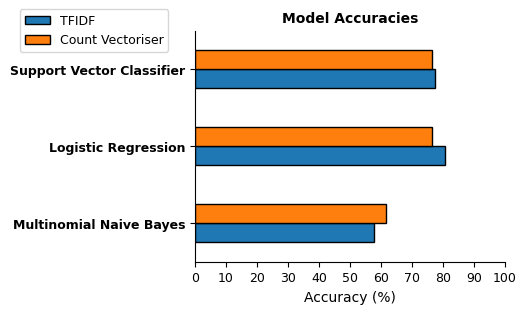

In [ ]:
# Plotting the accuracies
vals=[str(np.round(x,2))+'%' for x in 100*df_acc.values.flatten()]

fig=plt.figure()
ax=fig.add_subplot()
df_acc.plot(kind='barh',edgecolor='black',figsize=(4,3),label=True,rot=0,ax=ax)
#annotations()
plt.xticks(ticks=np.arange(0,1.1,0.1),labels=np.arange(0,110,10),fontsize=9)
plt.yticks(fontweight='bold',fontsize=9)
plt.xlabel('Accuracy (%)')
plt.ylabel('')
plt.title('Model Accuracies',fontweight='bold',fontsize=10)
plt.legend(bbox_to_anchor=(-0.065,1.12),fontsize=9)
ax.spines[['top','right']].set_visible(False)
plt.show()

fig.savefig('classif_accuracy',bbox_inches='tight')

In [ ]:
# Evaluating by classes
df_senti_tfidf=pd.DataFrame()
df_senti_cv=pd.DataFrame()

for tf,cv,mod in zip(list_tfidf,list_count_vec,list_models) :
  for s in list_senti :
    d1=round(pd.json_normalize(tf[s]),3)
    d2=round(pd.json_normalize(cv[s]),3)

    d1[['model','class']]=mod,s
    d2[['model','class']]=mod,s

    df_senti_tfidf=pd.concat([df_senti_tfidf,d1],axis=0)
    df_senti_cv=pd.concat([df_senti_cv,d2],axis=0)

df_senti_tfidf.set_index(['model','class'],inplace=True)
df_senti_cv.set_index(['model','class'],inplace=True)

df_classes=pd.concat({'TFIDF':df_senti_tfidf,'Count Vectorizer':df_senti_cv},axis=1)
display(df_classes)

TFIDF                          \
                                   precision recall f1-score support   
model                     class                                        
Multinomial Naive Bayes   Positive     0.886  0.425    0.575   49342   
                          Neutral      0.667  0.765    0.713   74391   
                          Negative     0.110  0.206    0.143   16835   
Logistic Regression       Positive     0.967  0.838    0.898   49342   
                          Neutral      0.861  0.779    0.818   74391   
                          Negative     0.470  0.851    0.606   16835   
Support Vector Classifier Positive     0.933  0.786    0.853   49342   
                          Neutral      0.766  0.865    0.812   74391   
                          Negative     0.379  0.335    0.356   16835   

                                   Count Vectorizer                          
                                          precision recall f1-score support  
model                     class                                              
Multinomial Naive Bayes   Positive            0.735  0.751    0.743   49588  
                          Neutral             0.743  0.486    0.588   73773  
                          Negative            0.322  0.779    0.455   17207  
Logistic Regression       Positive            0.979  0.820    0.892   49588  
                          Neutral             0.849  0.681    0.756   73773  
                          Negative            0.420  0.973    0.586   17207  
Support Vector Classifier Positive            0.954  0.863    0.906   49588  
                          Neutral             0.867  0.676    0.760   73773  
                          Negative            0.391  0.869    0.539   17207

In [ ]:
# Line chart for recalls


In [ ]:
df_classes.loc['Logistic Regression','TFIDF']

,precision,recall,f1-score,support
class,,,,
Positive,0.967,0.838,0.898,49342
Neutral,0.861,0.779,0.818,74391
Negative,0.470,0.851,0.606,16835


## API :



Amazon [link](https://www.amazon.in/KWER-Multi-Purpose-Accessories-Multi-Layer-Organizer/dp/B0C3HRCHKT/ref=asc_df_B0C3HRCHKT/?tag=googleshopdes-21&linkCode=df0&hvadid=656067512114&hvpos=&hvnetw=g&hvrand=7376807132302628742&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9299774&hvtargid=pla-2197122928075&gclid=Cj0KCQjw9rSoBhCiARIsAFOipln8_afKRN07PbBDqdKHfgSFXV3XWAm-SuFSRXSWhhZbciYlMOcLhyoaArNuEALw_wcB&th=1)  to get new reviews.





In [ ]:
# @title Test a review { run: "auto", vertical-output: true, form-width: "40%", display-mode: "form" }

Feedback ="The product quality is gud and worth buying .. each rack moves freely and easy to use"  # @param {type:'string'}

result=new_review(feedback=Feedback,vectorizer=tfidf,model=ovr2)[0]

if result=='Positive' :
  print(emoji.emojize('Feedback sentiment : %s :green_circle:' %result))
elif result=='Negative' :
  print(emoji.emojize('Feedback sentiment : %s :red_circle:' %result))
else :
  print(emoji.emojize('Feedback sentiment : %s :white_circle:' %result))


Feedback sentiment : Negative 🔴


In [ ]:
# @title Test a review { run: "auto", vertical-output: true, form-width: "40%", display-mode: "form" }

Feedback ="Rigid and durable product, well designed and well built at an economic price. Wheels used are of good quality and coming with locks are an advantage. I would surely say it's a must have product."  # @param {type:'string'}

result=new_review(feedback=Feedback,vectorizer=tfidf,model=ovr2)[0]

if result=='Positive' :
  print(emoji.emojize('Feedback sentiment : %s :green_circle:' %result))
elif result=='Negative' :
  print(emoji.emojize('Feedback sentiment : %s :red_circle:' %result))
else :
  print(emoji.emojize('Feedback sentiment : %s :white_circle:' %result))


Feedback sentiment : Negative 🔴


# Clustering :

## Functions :

In [ ]:

def get_reviewer_info(groups) :
  dict1={}                                                                        # dictionary to hold list of info per customer/group

  for c,g in groups :
    z=g.groupby('reviewTime')['asin'].count()                                     # grouping a customer's orders by dates
    days=len(z)                                                                   # times a customer placed an order
    yrs=list(set(z.index.year))                                                   # years when orders were placed
    ratg_mode=g['overall'].mode()[0]

    dict1[c]=[ratg_mode,days,yrs]

  cust_freq=pd.DataFrame.from_dict(dict1,orient='index',
                                   columns=['rating','reviews_count','years_active'])      # converting dictionary to a dataframe
  cust_freq['no_years']=cust_freq['years_active'].apply(lambda x : len(x))                 # creating another column

  return cust_freq


def clustered_data(grouped_reviewers) :
  # Aggregating other information, per customer/group
  clusters=grouped_reviewers.aggregate({'asin':'count','polarity':'mean','price':'mean'})                                   # aggregating different columns by different metrics
  clusters[['polarity','price']]=round(clusters[['polarity','price']],2)                                     # rounding float values to 2 decimal places

  return clusters

# Function to draw a circle
def draw_circle(radius,color,edge_color) :
  centre_circle = plt.Circle((0, 0),radius, fc=color,edgecolor=edge_color)
  fig = plt.gcf()
  return fig.gca().add_artist(centre_circle)


In [ ]:
#
def optimal_clusters(features) :
  # Finding the optimal number of clusters
  wcss=[]                      # list for within clusters sum of square
  ss=[]                        # list for silhouette scores
  list_k=list(range(2,15))     # list of the no. of clusters

  for k in list_k :
    # build model
    model=KMeans(n_clusters=k,max_iter=50).fit(features)     # fitting the cluster_data for different number of clusters

    # WCSS
    wcss.append(model.inertia_)                              # gives the sum of square of errors within a cluster

    # Silhouette score
    ss.append(silhouette_score(features,model.labels_))      # silhouette score for different clusters

  # Plot the graph to find the optimal number of clusters
  fig=plt.figure(figsize=(9,4))
  plt.subplot(121)                                # Within Clusters Sum of Squares errors (WCSS)
  plt.plot(list_k,wcss,color='blue')
  plt.title('Elbow plot',fontsize=9)
  plt.xlabel('Clusters')
  plt.ylabel('WCSS')

  plt.subplot(122)
  plt.plot(list_k,ss,color='red')                 # Silhouette score
  plt.title('Silhouette Score',fontsize=9)
  plt.xlabel('Clusters')
  plt.ylabel('Silhouette scores')
  plt.suptitle('Optimal clusters for +ve reviewers in H&K',fontweight='bold')
  plt.show()

#
def clusters_pie(data,title,colors) :
  # Pie chart of customer clusters
  z=data['cluster'].value_counts()

  fig=plt.figure(figsize=(5,5))
  wedges,txt,autotxt=plt.pie(z,autopct='%1.1f%%',labels=['Cluster '+str(x) for x in z.index],
                             pctdistance=0.85,labeldistance=1.1,colors=colors,
                             wedgeprops={'edgecolor':'white','linewidth':2},
                             textprops={'fontweight':'bold','fontsize':9})
  draw_circle(radius=0.7,color='white',edge_color='white')
  plt.title(title,fontweight='bold',fontsize=12)
  plt.show()

#
def cluster_boxplot(data,title,suffix,x_label,figsize,padding=1.5) :
  # Box plot for each cluster
  groups=data.groupby('cluster')
  dict1={}
  columns=data.columns[1:-1]

  R,C,P=len(columns),1,1
  plt.subplots(R,C,figsize=figsize,gridspec_kw={'height_ratios':[2.5]*len(columns)})
  plt.subplots_adjust(hspace=padding)
  for col in columns :
    for c,g in groups :
      dict1['Cluster %d' %c]=g[col]

    clustered_col=pd.concat(dict1,axis=1)

    plt.subplot(R,C,P)
    sns.boxplot(clustered_col,orient='h',notch=True,medianprops={'linestyle':'-','color':'white'},flierprops={'marker':'.'},
                showmeans=True,meanline=True,meanprops={'linestyle':'--','color':'black'})
    if col=='polarity' :
      plt.axvline(x = 0, color = 'red', linestyle = '--', alpha = 0.5)
    plt.xticks(fontsize=8)
    plt.yticks(fontweight='bold',fontsize=8)
    plt.xlabel(x_label[P-1])
    plt.title(titles[P-1]+' '+suffix,fontweight='bold',fontsize=10)
    P+=1
  plt.show()

## Home & Kitchen :

In [ ]:
# Extracting customer's order frequency and years with amazon
hk_groups=data[data['set'].eq('hk')].groupby('reviewerID')             # Grouping data by reviewerIDs

hk_freq=get_reviewer_info(hk_groups)

display(hk_freq.head())

,rating,reviews_count,years_active,no_years
A0002382258OFJJ2UYNTR,5.0,2,[2013],1
A0010876CNE3ILIM9HV0,5.0,4,"[2013, 2014]",2
A00473363TJ8YSZ3YAGG9,4.0,6,"[2013, 2014]",2
A00593903MCE5GXTAGGNL,5.0,2,[2014],1
A0145698H8AAYMRXLBD8,5.0,2,[2013],1


In [ ]:
hk_clusters=clustered_data(grouped_reviewers=hk_groups)

hk_clusters[['reviews_count','no_years_active']]=hk_freq[['reviews_count','no_years']]        # assigning 3 columns to the dataframe

display(hk_clusters)

,asin,polarity,price,reviews_count,no_years_active
reviewerID,,,,,
A0002382258OFJJ2UYNTR,5,0.24,13.04,2,1
A0010876CNE3ILIM9HV0,7,0.02,13.40,4,2
A00473363TJ8YSZ3YAGG9,12,0.10,18.96,6,2
A00593903MCE5GXTAGGNL,14,0.19,12.31,2,1
A0145698H8AAYMRXLBD8,5,0.19,32.56,2,1
...,...,...,...,...,...
AZZRRYBQG57LF,24,0.17,12.77,6,3
AZZTC2OYVNE2Q,6,0.09,30.56,2,2
AZZV9PDNMCOZW,14,0.08,43.31,11,6


In [ ]:
# Null values in the data
print('Null values in the data :\n',hk_clusters.isnull().sum(),'\n')

Null values in the data :
 asin               0
polarity           6
price              5
reviews_count      0
no_years_active    0
dtype: int64 



In [ ]:
# Droping null values
hk_clusters.dropna(inplace=True)
hk_clusters.reset_index(inplace=True)                     # resetting the index

display(hk_clusters.describe())

,asin,polarity,price,reviews_count,no_years_active
count,66508.000000,66508.000000,66508.000000,66508.00000,66508.000000
mean,8.291980,0.122373,45.515753,5.51260,2.737941
std,6.812333,0.077110,34.915160,5.43144,1.422311
min,4.000000,-0.200000,1.690000,1.00000,1.000000
25%,5.000000,0.070000,22.260000,3.00000,2.000000
50%,6.000000,0.120000,35.090000,5.00000,2.000000
75%,9.000000,0.170000,57.282500,6.00000,3.000000
max,277.000000,0.930000,536.120000,226.00000,15.000000


In [ ]:
# Scaling the price and count of products
scaler=StandardScaler()

hk_features=scaler.fit_transform(hk_clusters.iloc[:,1:])
hk_features

array([[-0.48324188,  1.52545684, -0.93014029, -0.64672102, -1.22192285],
       [-0.1896545 , -1.32763628, -0.91982951, -0.27849177, -0.51883648],
       [ 0.54431395, -0.29014787, -0.76058516,  0.08973747, -0.51883648],
       ...,
       [ 0.83790133, -0.54951997, -0.06317514,  1.01031058,  2.29350904],
       [-0.33644819, -0.03077577,  3.28639788,  0.08973747,  0.1842499 ],
       [-0.1896545 , -0.29014787,  1.15578876,  0.08973747,  0.1842499 ]])

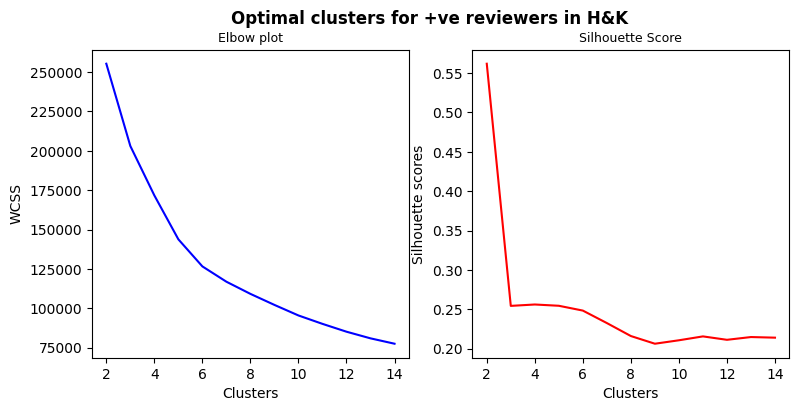

In [ ]:
optimal_clusters(hk_features)

In [ ]:
# Based on the graphs, let the optimal number of clusters be 6
k=4

# Building clustering model
model=KMeans(n_clusters=k,max_iter=50,random_state=648)

# Clustering reviewerIDs
hk_clusters['cluster']=model.fit_predict(hk_features)

hk_clusters.head()

,reviewerID,asin,polarity,price,reviews_count,no_years_active,cluster
0,A0002382258OFJJ2UYNTR,5,0.24,13.04,2,1,1
1,A0010876CNE3ILIM9HV0,7,0.02,13.40,4,2,0
2,A00473363TJ8YSZ3YAGG9,12,0.10,18.96,6,2,1
3,A00593903MCE5GXTAGGNL,14,0.19,12.31,2,1,1
4,A0145698H8AAYMRXLBD8,5,0.19,32.56,2,1,1


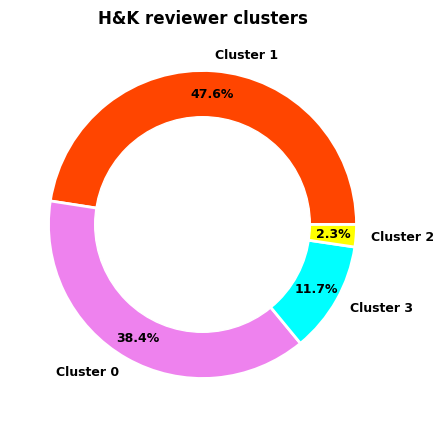

In [ ]:
clusters_pie(hk_clusters,title='H&K reviewer clusters',
             colors=['orangered','violet','cyan','yellow','purple'])

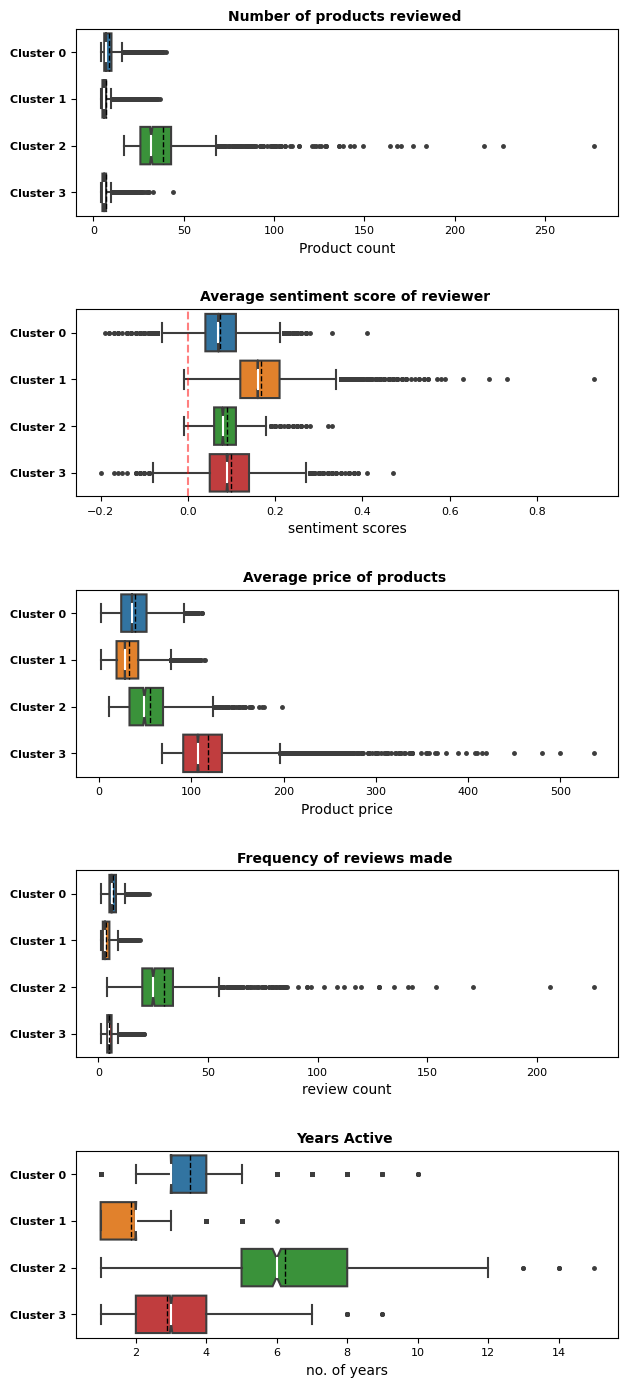

In [ ]:
titles=['Number of products reviewed','Average sentiment score of reviewer','Average price of products',
        'Frequency of reviews made','Years Active']
x_labels=['Product count','sentiment scores','Product price','review count','no. of years']

cluster_boxplot(data=hk_clusters,title=titles,suffix='',x_label=x_labels,figsize=(7,17),padding=0.5)

In [ ]:
# Statistical description of each cluster
dict1={}

for c in np.sort(hk_clusters['cluster'].unique()) :
  dict1['Cluster %d' %c]=hk_clusters[hk_clusters['cluster']==c].iloc[:,1:-1].describe().T

hk_clusters_desc=pd.concat(dict1)
hk_clusters_desc

count        mean        std    min    25%  \
Cluster 0 asin             25549.0    8.783749   4.433291   4.00   6.00   
          polarity         25549.0    0.074570   0.052768  -0.19   0.04   
          price            25549.0   38.847890  18.490882   1.89  24.00   
          reviews_count    25549.0    6.577635   3.096330   1.00   5.00   
          no_years_active  25549.0    3.549376   1.210972   1.00   3.00   
Cluster 1 asin             31628.0    6.772164   2.686943   4.00   5.00   
          polarity         31628.0    0.168341   0.069857  -0.01   0.12   
          price            31628.0   32.507146  17.721992   1.69  18.93   
          reviews_count    31628.0    3.567472   1.763206   1.00   2.00   
          no_years_active  31628.0    1.875585   0.769461   1.00   1.00   
Cluster 2 asin              1556.0   38.784704  22.036609  17.00  26.00   
          polarity          1556.0    0.090508   0.046392  -0.01   0.06   
          price             1556.0   54.817789  28.932923  10.55  32.96   
          reviews_count     1556.0   29.994859  17.705594   4.00  20.00   
          no_years_active   1556.0    6.238432   2.139889   1.00   5.00   
Cluster 3 asin              7775.0    6.756013   2.696083   4.00   5.00   
          polarity          7775.0    0.098842   0.067597  -0.20   0.05   
          price             7775.0  118.482894  41.031487  68.65  91.20   
          reviews_count     7775.0    5.025852   2.488300   1.00   4.00   
          no_years_active   7775.0    2.878971   1.225066   1.00   2.00   

                               50%      75%     max  
Cluster 0 asin               7.000   10.000   40.00  
          polarity           0.070    0.110    0.41  
          price             35.620   51.450  111.33  
          reviews_count      6.000    8.000   23.00  
          no_years_active    3.000    4.000   10.00  
Cluster 1 asin               6.000    7.000   37.00  
          polarity           0.160    0.210    0.93  
          price             27.990   42.460  115.32  
          reviews_count      3.000    5.000   19.00  
          no_years_active    2.000    2.000    6.00  
Cluster 2 asin              32.000   43.000  277.00  
          polarity           0.080    0.110    0.33  
          price             49.185   69.305  198.76  
          reviews_count     25.000   34.000  226.00  
          no_years_active    6.000    8.000   15.00  
Cluster 3 asin               6.000    7.000   44.00  
          polarity           0.090    0.140    0.47  
          price            107.150  133.105  536.12  
          reviews_count      5.000    6.000   21.00  
          no_years_active    3.000    4.000    9.00

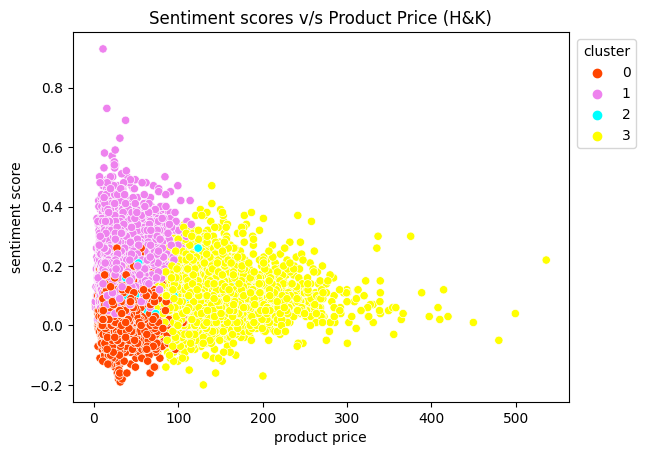

In [ ]:
sns.scatterplot(data=hk_clusters,x='price',y='polarity',hue='cluster',
                palette=['orangered','violet','cyan','yellow','purple'])
plt.xlabel('product price')
plt.ylabel('sentiment score')
plt.title('Sentiment scores v/s Product Price (H&K)')
plt.legend(bbox_to_anchor=(1.15,1),title='cluster')
plt.show()

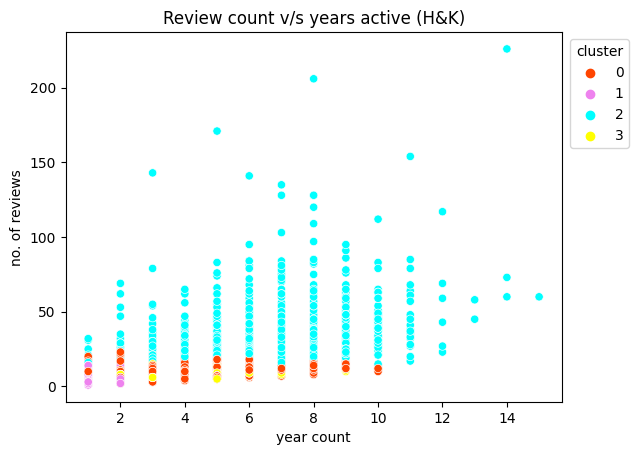

In [ ]:
sns.scatterplot(data=hk_clusters,x='no_years_active',y='reviews_count',hue='cluster',
                palette=['orangered','violet','cyan','yellow','purple'])
plt.xlabel('year count')
plt.ylabel('no. of reviews')
plt.title('Review count v/s years active (H&K)')
plt.legend(bbox_to_anchor=(1.15,1),title='cluster')
plt.show()

In [ ]:
hk_clusters.to_csv('/content/drive/MyDrive/hk_clusters.csv')

## Grocery and Gourmet Food :

In [ ]:
# Extracting customer's order frequency and years with amazon
ggf_groups=data[data['set'].eq('ggf')].groupby('reviewerID')             # Grouping data by reviewerIDs

ggf_freq=get_reviewer_info(ggf_groups)

display(ggf_freq.head())

,rating,reviews_count,years_active,no_years
A00177463W0XWB16A9O05,5.0,4,[2013],1
A022899328A0QROR32DCT,5.0,8,"[2012, 2013, 2014]",3
A04309042SDSL8YX2HRR7,4.0,5,[2013],1
A068255029AHTHDXZURNU,5.0,2,[2014],1
A06944662TFWOKKV4GJKX,5.0,3,[2013],1


In [ ]:
ggf_clusters=clustered_data(grouped_reviewers=ggf_groups)

ggf_clusters[['reviews_count','no_years_active']]=ggf_freq[['reviews_count','no_years']]        # assigning 3 columns to the dataframe

display(ggf_clusters)

,asin,polarity,price,reviews_count,no_years_active
reviewerID,,,,,
A00177463W0XWB16A9O05,13,0.19,20.96,4,1
A022899328A0QROR32DCT,10,0.02,25.02,8,3
A04309042SDSL8YX2HRR7,5,0.08,15.07,5,1
A068255029AHTHDXZURNU,9,0.15,19.57,2,1
A06944662TFWOKKV4GJKX,9,0.07,22.68,3,1
...,...,...,...,...,...
AZWRZZAMX90VT,23,0.09,23.24,19,6
AZXKAH2DE6C8A,25,0.14,19.77,11,5
AZXON596A1VXC,7,0.15,32.09,4,2


In [ ]:
# Null values in the data
print('Null values in the data :\n',ggf_clusters.isnull().sum(),'\n')

Null values in the data :
 asin                0
polarity            1
price              10
reviews_count       0
no_years_active     0
dtype: int64 



In [ ]:
# Droping null values
ggf_clusters.dropna(inplace=True)
ggf_clusters.reset_index(inplace=True)                 # resetting the index

display(ggf_clusters.describe())

,asin,polarity,price,reviews_count,no_years_active
count,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000
mean,10.249983,0.137113,23.337251,7.465754,2.928799
std,10.579514,0.071376,9.301688,8.598406,1.542404
min,1.000000,-0.320000,2.940000,1.000000,1.000000
25%,5.000000,0.090000,18.840000,4.000000,2.000000
50%,7.000000,0.130000,22.770000,5.000000,3.000000
75%,11.000000,0.180000,27.020000,8.000000,4.000000
max,204.000000,0.650000,375.320000,152.000000,11.000000


In [ ]:
# Scaling the price and count of products
scaler=StandardScaler()

ggf_features=scaler.fit_transform(ggf_clusters.iloc[:,1:])
ggf_features

array([[ 0.25994673,  0.74098672, -0.25558064, -0.40308306, -1.25055743],
       [-0.02362977, -1.64085665,  0.18091406,  0.06213521,  0.04616402],
       [-0.49625727, -0.80020605, -0.88882049, -0.28677849, -1.25055743],
       ...,
       [-0.30720627,  0.18055299,  0.9410169 , -0.40308306, -0.60219671],
       [-0.40173177,  0.32066142,  0.24972111, -0.63569219, -0.60219671],
       [-0.49625727, -0.37988075, -0.10506523, -0.28677849,  0.04616402]])

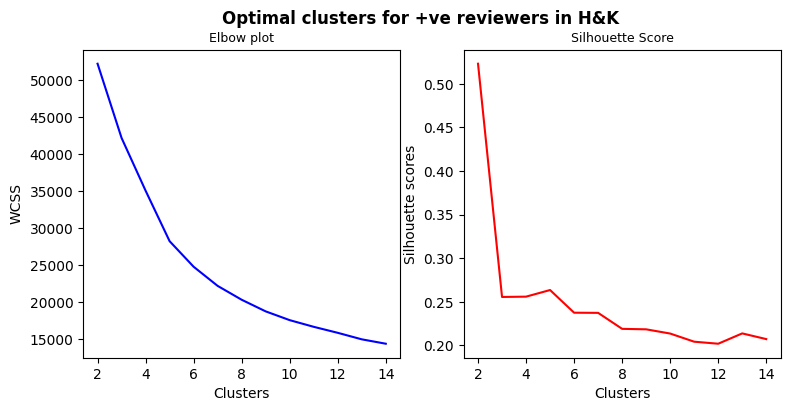

In [ ]:
optimal_clusters(ggf_features)

In [ ]:
# Based on the graphs, let the optimal number of clusters be 6
k=3

# Building clustering model
model=KMeans(n_clusters=k,max_iter=50,random_state=648)

# Clustering reviewerIDs
ggf_clusters['cluster']=model.fit_predict(ggf_features)

ggf_clusters.head()

,reviewerID,asin,polarity,price,reviews_count,no_years_active,cluster
0,A00177463W0XWB16A9O05,13,0.19,20.96,4,1,0
1,A022899328A0QROR32DCT,10,0.02,25.02,8,3,1
2,A04309042SDSL8YX2HRR7,5,0.08,15.07,5,1,0
3,A068255029AHTHDXZURNU,9,0.15,19.57,2,1,0
4,A06944662TFWOKKV4GJKX,9,0.07,22.68,3,1,1


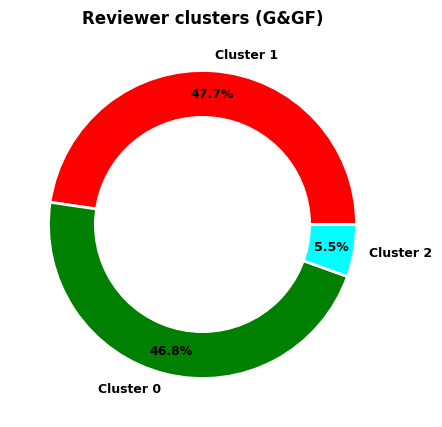

In [ ]:
clusters_pie(ggf_clusters,title='Reviewer clusters (G&GF)',
             colors=['red','green','cyan'])

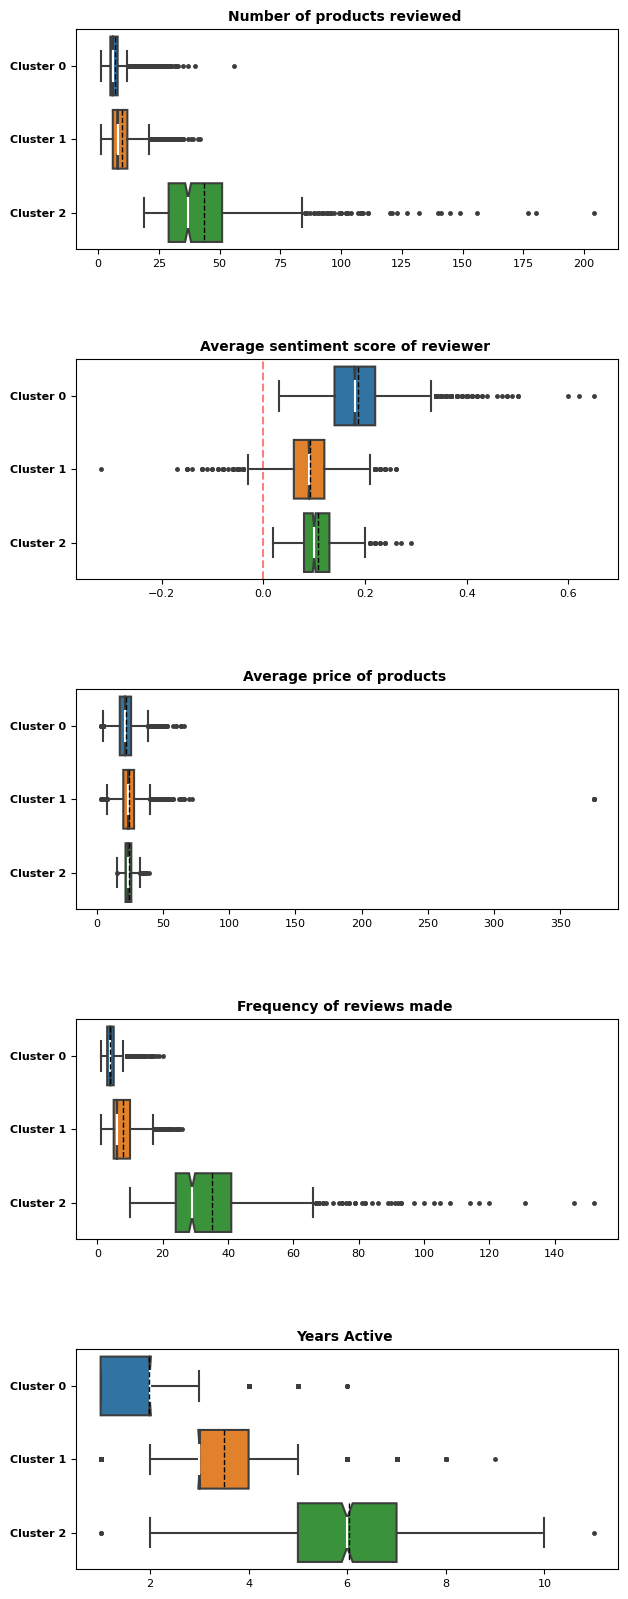

In [ ]:
titles=['Number of products reviewed','Average sentiment score of reviewer','Average price of products',
        'Frequency of reviews made','Years Active']
xlabels=['','','','','']

cluster_boxplot(data=ggf_clusters,title=titles,suffix='',x_label=xlabels,figsize=(7,20),padding=0.5)

In [ ]:
# Statistical description of each cluster
dict1={}

for c in np.sort(ggf_clusters['cluster'].unique()) :
  dict1['Cluster %d' %c]=ggf_clusters[ggf_clusters['cluster']==c].iloc[:,1:-1].describe().T

ggf_clusters_desc=pd.concat(dict1)
ggf_clusters_desc

count       mean        std    min    25%     50%  \
Cluster 0 asin             6912.0   6.960503   3.248058   1.00   5.00   6.000   
          polarity         6912.0   0.186859   0.061594   0.03   0.14   0.180   
          price            6912.0  21.880871   6.662899   2.94  17.40  21.375   
          reviews_count    6912.0   3.987269   2.116451   1.00   3.00   4.000   
          no_years_active  6912.0   1.979890   0.854838   1.00   1.00   2.000   
Cluster 1 asin             7040.0   9.657102   5.283445   1.00   6.00   8.000   
          polarity         7040.0   0.091652   0.046612  -0.32   0.06   0.090   
          price            7040.0  24.691176  11.508715   2.94  20.05  23.840   
          reviews_count    7040.0   7.721449   4.266262   1.00   5.00   6.000   
          no_years_active  7040.0   3.503835   1.300218   1.00   3.00   3.000   
Cluster 2 asin              809.0  43.514215  22.531444  19.00  29.00  37.000   
          polarity          809.0   0.107701   0.040546   0.02   0.08   0.100   
          price             809.0  23.998393   3.519528  14.94  21.73  23.660   
          reviews_count     809.0  34.960445  17.108663  10.00  24.00  29.000   
          no_years_active   809.0   6.032138   1.501305   1.00   5.00   6.000   

                               75%     max  
Cluster 0 asin              8.0000   56.00  
          polarity          0.2200    0.65  
          price            25.9425   65.89  
          reviews_count     5.0000   20.00  
          no_years_active   2.0000    6.00  
Cluster 1 asin             12.0000   42.00  
          polarity          0.1200    0.26  
          price            28.1925  375.32  
          reviews_count    10.0000   26.00  
          no_years_active   4.0000    9.00  
Cluster 2 asin             51.0000  204.00  
          polarity          0.1300    0.29  
          price            26.1000   39.72  
          reviews_count    41.0000  152.00  
          no_years_active   7.0000   11.00

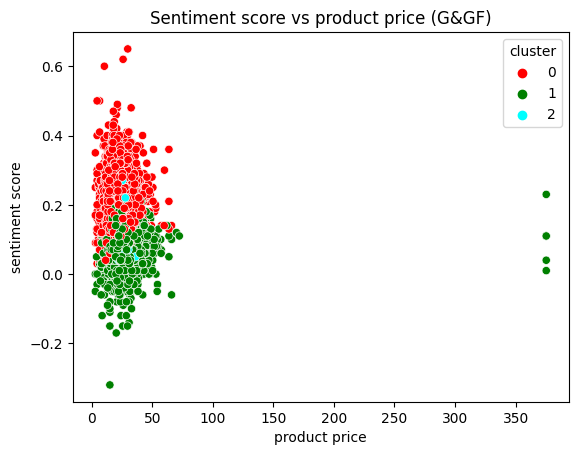

In [ ]:
sns.scatterplot(data=ggf_clusters,x='price',y='polarity',hue='cluster',
                palette=['red','green','cyan'])
plt.xlabel('product price')
plt.ylabel('sentiment score')
plt.title('Sentiment score vs product price (G&GF)')
plt.legend(bbox_to_anchor=(1,1),title='cluster')
plt.show()

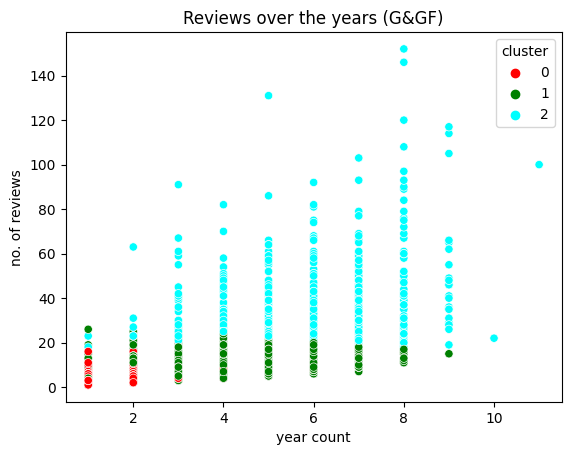

In [ ]:
sns.scatterplot(data=ggf_clusters,x='no_years_active',y='reviews_count',hue='cluster',
                palette=['red','green','cyan'])
plt.xlabel('year count')
plt.ylabel('no. of reviews')
plt.title('Reviews over the years (G&GF)')
plt.legend(bbox_to_anchor=(1,1),title='cluster')
plt.show()

In [ ]:
ggf_clusters.to_csv('/content/drive/MyDrive/ggf_clusters.csv')